In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

# Data Preparation

In [3]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH = Path('/') 
path = PATH

In [4]:
LM_PATH= Path("data/models/")
LM_PATH.mkdir(parents=True, exist_ok=True)
LM_PATH.ls()

[]

In [5]:
df = pd.read_csv(f"songs_bs.csv")
df.head()

,web-scraper-order,web-scraper-start-url,pages,pages-href,songs,songs-href,text,label
0,1543229139-166,https://songteksten.net/artist/lyrics/40/the-b...,5,https://songteksten.net/artist/lyrics/40/the-b...,Junk,https://songteksten.net/lyric/40/930/the-beatl...,The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...,beatles
1,1543228955-76,https://songteksten.net/artist/lyrics/40/the-b...,7,https://songteksten.net/artist/lyrics/40/the-b...,Sure To Fall (In Love With You),https://songteksten.net/lyric/40/1028/the-beat...,The Beatles - Sure To Fall (In Love With You)\...,beatles
2,1543229286-237,https://songteksten.net/artist/lyrics/40/the-b...,3,https://songteksten.net/artist/lyrics/40/the-b...,Glad All Over,https://songteksten.net/lyric/40/856/the-beatl...,The Beatles - Glad All Over\nAin`t no doubt ab...,beatles
3,1543229320-253,https://songteksten.net/artist/lyrics/40/the-b...,2,https://songteksten.net/artist/lyrics/40/the-b...,Everybody's Got Something To Hide Except For M...,https://songteksten.net/lyric/40/841/the-beatl...,The Beatles - Everybody's Got Something To Hid...,beatles
4,1543229294-241,https://songteksten.net/artist/lyrics/40/the-b...,3,https://songteksten.net/artist/lyrics/40/the-b...,From Us To You,https://songteksten.net/lyric/40/852/the-beatl...,The Beatles - From Us To You\nDa da da da da d...,beatles


In [6]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'pages', 'pages-href',
       'songs', 'songs-href', 'text', 'label'],
      dtype='object')

In [7]:
#select columns
df = df[['text', 'label']]

In [8]:
#rename columns
df.rename(columns= {}, inplace=True)

In [9]:
#del df['ColumName']
df.head()


,text,label
0,The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...,beatles
1,The Beatles - Sure To Fall (In Love With You)\...,beatles
2,The Beatles - Glad All Over\nAin`t no doubt ab...,beatles
3,The Beatles - Everybody's Got Something To Hid...,beatles
4,The Beatles - From Us To You\nDa da da da da d...,beatles


In [10]:
from bs4 import BeautifulSoup

In [11]:
df['text'] = df['text'].astype(str)

In [12]:
df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [13]:
df['text'].head()

0    The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...
1    The Beatles - Sure To Fall (In Love With You)\...
2    The Beatles - Glad All Over\nAin`t no doubt ab...
3    The Beatles - Everybody's Got Something To Hid...
4    The Beatles - From Us To You\nDa da da da da d...
Name: text, dtype: object

In [14]:
df.replace({'The Beatles -': ''}, regex=True, inplace=True)

In [15]:
df.replace({'Rolling Stones -': ''}, regex=True, inplace=True)

In [16]:
df['text'].head()

0     Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...
1     Sure To Fall (In Love With You)\nI`m sure to ...
2     Glad All Over\nAin`t no doubt about it\n\nThi...
3     Everybody's Got Something To Hide Except For ...
4     From Us To You\nDa da da da da dum dum dum\n\...
Name: text, dtype: object

In [17]:
columns_fill_zero = []

In [18]:
columns_fill_string = ['text']

In [19]:
df[columns_fill_string] = df[columns_fill_string].fillna("")
df[columns_fill_zero].fillna(0, inplace=True)

/home/martijn/anaconda3/envs/FastAI_P37/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [20]:
df[columns_fill_string +columns_fill_zero].head()

,text
0,Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...
1,Sure To Fall (In Love With You)\nI`m sure to ...
2,Glad All Over\nAin`t no doubt about it\n\nThi...
3,Everybody's Got Something To Hide Except For ...
4,From Us To You\nDa da da da da dum dum dum\n\...


In [21]:
df['length'] = len(df['text'])

In [22]:
df = df.sort_values(by=['length'], ascending=False)

In [23]:
#df = df[df['length'] > 100] #take text with more then 100 words

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 3 columns):
text      641 non-null object
label     641 non-null object
length    641 non-null int64
dtypes: int64(1), object(2)
memory usage: 20.0+ KB


In [25]:
#save the cleaned file
df.to_csv(f"clean.csv", index=False, header=True)

In [26]:
df = pd.read_csv(f"clean.csv")

## Some statistics of dataset

### Number of documents

In [27]:
df.shape, df.columns

((641, 3), Index(['text', 'label', 'length'], dtype='object'))

### Number of words in all the documents

In [28]:
df['text'] = df['text'].astype(str)

In [29]:
df['text'].apply(lambda x: len(x.split(" "))).sum()

126632

### Number of unique tokens across documents

In [30]:
len(set(''.join(df['text'].values).split(" ")))

14649

# Language model


We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipeia called wikitext-103). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviex lefts by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust a little bit the parameters of our model. Plus there might be some words extremely common in that dataset that were barely present in wikipedia, and therefore might no be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).


# Custom

## Datablock

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.


In [31]:
df = pd.read_csv("clean.csv")

In [32]:
df['text'] = df['text'].astype(str)

In [33]:
df_lm = df[['text', 'label']]
df_lm.head()

,text,label
0,Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...,beatles
1,"Susie Q\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Su...",stones
2,Like A Rolling Stone\nOnce upon a time you dr...,stones
3,"Uptight\nBaby, everything is all right, uptig...",stones
4,You Better Move On\nYou ask me to give up the...,stones


In [34]:
df_lm['text'] = df_lm['text'].fillna("")

/home/martijn/anaconda3/envs/FastAI_P37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
txt_proc = [
    TokenizeProcessor(tokenizer=Tokenizer(lang='en'), mark_fields=True),
    NumericalizeProcessor(min_freq=0, max_vocab=60000)
]

In [36]:
data_cust_lm = (TextList.from_df(df_lm, cols='text', processor=txt_proc)  
             .random_split_by_pct(0.1)
             .label_for_lm()           
             .databunch())


In [37]:
#data_cust_lm.save('tmp_cust_lm_10000')
data_cust_lm.save('tmp')

In [38]:
pwd

'/home/martijn/own/songs'

In [39]:
data_cust_lm = TextLMDataBunch.load(path='')

In [40]:
len(data_cust_lm.vocab.itos), len(data_cust_lm.train_ds), len(data_cust_lm.valid_ds)

(5769, 577, 64)

In [42]:
data_cust_lm.show_batch(rows = 3)

idx,text
0,"xxbos xxfld 1 tomorrow never knows \n turn off your mind , relax and float down stream , \n\n it is not dying , it is not dying \n\n lay down al thoughts , surrender to the void , \n\n it is shining , it is shining . \n\n yet you may see the meaning of within \n\n it is being , it is being \n\n love is all"
1,"\n\n fellers , mm , she can`t get , \n\n oh , fellers , oh , she ain`t met . \n\n georgia claimed her , georgia named her , \n\n sweet georgia brown . \n\n oh , that sweet georgia \n\n oh oh oh , brown \n\n oh yeah xxbos xxfld 1 ob - la - di , ob - la - da \n desmond has a barrow in"
2,"` dice , yeah \n got to roll me \n baby xxrep 4 . ? ? \n yeah , my , my , my \n i went down baby , oh \n got to roll me ( hit me ) \n baby i`m down \n \n xxbos xxfld 1 matchbox \n i said i`m sittin ` here watchin ` \n\n matchbox hole in my clothes \n\n i said i`m sittin"


In [43]:
learn_cust_lm = language_model_learner(data_cust_lm, drop_mult=0.3)

In [44]:
#load pretrained model wiki issues with not matching vocab size
#learn_cust_lm.load(Path('fine_tuned_1e-4_1e_03798'))

In [45]:
learn_cust_lm.lr_find()

RuntimeError: CUDA error: out of memory

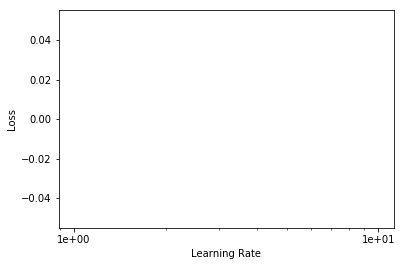

In [46]:
learn_cust_lm.recorder.plot(skip_end=15)

In [ ]:
#learn_vac.unfreeze()
learn_cust_lm.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.save('cust_first')

In [ ]:
learn_cust_lm.recorder.plot_losses()

In [ ]:
learn_cust_lm.freeze_to(-2)
learn_cust_lm.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.freeze_to(-3)
learn_cust_lm.fit_one_cycle(1, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.save('lm_customized')

In [ ]:
#learn_cust_lm.load('lm_customized')

In [ ]:
learn_cust_lm.model

In [ ]:
learn_cust_lm.unfreeze()
learn_cust_lm.fit_one_cycle(10, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.unfreeze()
learn_cust_lm.fit_one_cycle(10, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.unfreeze()
learn_cust_lm.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn_cust_lm.save_encoder('lm_specalized_enc')

In [ ]:
learn_cust_lm.predict('All you need is ', 100, temperature=1.1, min_p=0.001)

In [ ]:
learn_cust_lm.predict('Well, if your hands start a-clappin', 100, temperature=1.1, min_p=0.001)

In [ ]:
learn_cust_lm.predict('I cant get no satisfaction', 100, temperature=1.1, min_p=0.001)

# Classifier

In [ ]:
bs  = 24

In [ ]:
df = pd.read_csv("clean.csv")
df['text'] = df['text'].astype(str)
df.info()


In [ ]:
df_clas = df[['text', 'label']]
df_clas.head()

In [ ]:
data_clas = (TextList.from_df(df_clas, vocab=data_cust_lm.vocab)
             .random_split_by_pct(0.1)
             .label_from_df(cols=1)      
             .databunch(bs = bs))
data_clas.save('tmp_clas')

In [ ]:
data_clas = TextClasDataBunch.load('tmp_clas', bs = bs)

In [ ]:
data_clas.show_batch()

In [ ]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.5)
learn_clas.load_encoder('lm_specalized_enc')


In [ ]:
learn_clas.lr_find()

In [ ]:
learn_clas.recorder.plot()

In [ ]:
learn_clas.fit_one_cycle(3, 5e-3, moms=(0.8,0.7))

In [ ]:
learn_clas.save('clas_first')

In [ ]:
learn_clas.load('clas_first');

In [ ]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn_clas.save('clas_second')

In [ ]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn_clas.save('clas_third')

In [ ]:
#learn_clas.load('clas_third')

In [ ]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(5, slice(5e-4/(2.6**4),5e-4), moms=(0.8,0.7))

In [ ]:
learn_clas.save('clas_fourth')

In [ ]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(5, slice(5e-5/(2.6**4),5e-5), moms=(0.8,0.7))

In [ ]:
learn_clas.save('clas_fifth')

In [ ]:
#learn_clas.get_preds

In [ ]:
df_clas.head()

In [ ]:
df_val_true = df_clas.loc[df_clas['label']== 'stones']['text']
df_val_true.head()

In [ ]:
df_val_true[1]

In [ ]:
#new beatles tekst not in the training or validation
test_b = 'All you need is love, love. Love is all you need. '

In [ ]:
#new stones tekst not in the training or validation
test_s = "I cant get no satisfaction cause I try and I try"

In [ ]:
arr_results = []

In [ ]:
pe = learn_clas.predict(test_b)
pe[0], pe[2].data[0], pe


In [ ]:
pe = learn_clas.predict(test_s)
pe[0], pe[2].data[0], pe

In [ ]:
song_b = "A bad little kid moved in to my neighborhood He won`t do nothing right just sitting down and looks so good He don`t want to go to school and learn to read and write Just sits around the house and plays that rock and roll music all night  Well, he put some tacks on teachers chair Puts chewing gum in little girl`s hair Now, junior, behave yourself! Buy every rock and roll book on the magazine stand Every dime that he get-ooh is lost to the jukebox man Well he worries his teacher till at night she`s a-ready to poop From rockin` and a-rollin`, spinnin` in a hula hoop! Well this rock and roll has gotta stop Junior`s head is hard as rock Now, junior, behave yourself! ow!"
song_b2 = "Blackbird singing in the dead of night Take these broken wings and learn to fly All your life You were only waiting for this moment to arise  Blackbird singing in the dead of night Take these sunken eyes and learn to see All your life You were only waiting for this moment to be free.  Blackbird fly, Blackbird fly Into the light of a dark black night.  Blackbird fly, Blackbird fly  Into the light of a dark black night.  Blackbird singing in the dead of night  Take these broken wings and learn to fly All your life You were only waiting for this moment to arise You were only waiting for this moment to arise You were only waiting for this moment to arise" 

In [ ]:
pe = learn_clas.predict(song_b2)
print(pe)

In [ ]:
song_s = "When I'm ridin round the world And I'm doin this and I'm signing that And I'm tryin to make some girl Who tells me baby better come back later next week  cause you see I'm on losing streak I can't get no, oh no no no  "
song_s2 = "I can't get no satisfaction I can't get no girl with action 'cause I try and I try and I try and I try I can't get no, I can't get no "

In [ ]:
learn_clas.predict(song_s)


In [ ]:

df_res = pd.DataFrame(columns= ['text', 'prediction','result' ])


In [ ]:
for x in df_val_true[:20]:
    p = learn_clas.predict(x)
    df_res = df_res.append({'text': x, 'result': p[0], 'prediction': p[2] },ignore_index=True)
   

In [ ]:
#print the list with predictions
df_res.sort_values('result', ascending=True).head(10)